### A Demonstração do Resultado do Exercício (DRE) e o Balanço Patrimonial são duas das demonstrações contábeis mais importantes para entender a saúde financeira de uma empresa. Juntas, elas fornecem um retrato completo da situação da empresa em um determinado período.


### Demonstração do Resultado do Exercício (DRE)
#### A DRE nos mostra o desempenho financeiro da empresa em um período específico. Lucro/Prejuízo, Custos, Despesas entre outras informações.



### Balanço Patrimonial (BP):

#### O Balanço Patrimonial, por sua vez, é como uma "fotografia" da situação financeira da empresa em um momento específico. Daí obtemos informações sobre:
#### Ativos: Tudo o que a empresa possui de valor, como dinheiro em caixa, estoque, imóveis, equipamentos, etc.
#### Passivos: As dívidas da empresa, como empréstimos, contas a pagar, etc.
#### Patrimônio Líquido: A diferença entre os ativos e os passivos, representando o valor que os proprietários têm na empresa.

### Carrego algumas bibliotecas:

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import yfinance as yf
import os
import matplotlib.dates as mdates

### Função para baixar os dados da DRE:

In [2]:
def DRE():
    # Lista de tickers das empresas. Adicione as empresas que desejar
    tickers = ['WEGE3.SA', 'EMBR3.SA', 'ITUB4.SA']

    # Dicionário para armazenar os DataFrames com os nomes dinâmicos
    dataframes = {}

    # Loop para baixar a Demonstração de Resultados Anual de cada empresa
    for ticker in tickers:
        ativo = yf.Ticker(ticker)
        dre_anual = ativo.financials

        # Filtrar os dados anuais a partir de 2019
        dre_anual_filtered = dre_anual.loc[:, dre_anual.columns >= '2019-01-01']

        # Transpor o DataFrame e armazenar com um nome dinâmico baseado no ticker
        df_name = f"df_{ticker.split('.')[0]}"  # Nome do DataFrame sem o ".SA"
        dataframes[df_name] = dre_anual_filtered.T

        #colocar o index como coluna e nomear de Date
        dataframes[df_name].reset_index(inplace=True)
        dataframes[df_name].rename(columns={'index': 'Date'}, inplace=True)

        #colocar a coluna Date como Datetime e colocar apenas o ano
        dataframes[df_name]['Date'] = pd.to_datetime(dataframes[df_name]['Date'])
        dataframes[df_name]['Date'] = dataframes[df_name]['Date'].dt.year

    # Retornar o dicionário contendo os DataFrames para cada ticker
    return dataframes

In [3]:
# Chamando a função
dfs = DRE()

In [4]:
# Acessar um DataFrame específico, por exemplo, WEGE3
df_WEGE3 = dfs['df_WEGE3']
df_WEGE3.head()

,Date,Tax Effect Of Unusual Items,Tax Rate For Calcs,Normalized EBITDA,Total Unusual Items,Total Unusual Items Excluding Goodwill,Net Income From Continuing Operation Net Minority Interest,Reconciled Depreciation,Reconciled Cost Of Revenue,EBITDA,...,Operating Income,Operating Expense,Other Operating Expenses,Selling General And Administration,Selling And Marketing Expense,General And Administrative Expense,Gross Profit,Cost Of Revenue,Total Revenue,Operating Revenue
0,2023,72283524.0,0.1097,6709981000.0,658920000.0,658920000.0,5731670000.0,628042000.0,21702737000.0,7368901000.0,...,6394022000.0,4406842000.0,322663000.0,3453408000.0,2408520000.0,1044888000.0,10800864000.0,21702737000.0,32503601000.0,32503601000.0
1,2022,40135578.3,0.1647,5515876000.0,243689000.0,243689000.0,4208084000.0,565557000.0,21209235000.0,5759565000.0,...,4951697000.0,3743790000.0,198729000.0,3046209000.0,2173274000.0,872935000.0,8695487000.0,21209235000.0,29904722000.0,29904722000.0
2,2021,8535132.7,0.1553,4847224000.0,54959000.0,54959000.0,3585947000.0,520178000.0,16602381000.0,4902183000.0,...,4228395000.0,2732562000.0,-269001000.0,2609211000.0,1833204000.0,776007000.0,6960957000.0,16602381000.0,23563338000.0,23563338000.0
3,2020,14693545.1,0.1277,3159789000.0,115063000.0,115063000.0,2340873000.0,451359000.0,12032050000.0,3274852000.0,...,2869449000.0,2568058000.0,91312000.0,2161286000.0,1506817000.0,654469000.0,5437507000.0,12032050000.0,17469557000.0,17469557000.0


In [5]:
#vou acessar agora o ITUB4
df_ITUB4 = dfs['df_ITUB4']
df_ITUB4.head()

,Date,Tax Effect Of Unusual Items,Tax Rate For Calcs,Total Unusual Items,Total Unusual Items Excluding Goodwill,Net Income From Continuing Operation Net Minority Interest,Reconciled Depreciation,Net Interest Income,Interest Expense,Interest Income,...,Depreciation And Amortization In Income Statement,Selling General And Administration,Selling And Marketing Expense,General And Administrative Expense,Other Gand A,Insurance And Claims,Salaries And Wages,Total Revenue,Operating Revenue,Other Non Interest Expense
0,2023,-529790327.455919,0.146675,-3612000000.0,-3612000000.0,33105000000.0,5652000000.0,64135000000.0,158250000000.0,222385000000.0,...,6529000000.0,51930000000.0,1996000000.0,49934000000.0,16527000000.0,1007000000.0,32400000000.0,148380000000.0,148380000000.0,17561000000.0
1,2022,-214691557.202812,0.175833,-1221000000.0,-1221000000.0,29207000000.0,4796000000.0,72418000000.0,116747000000.0,189165000000.0,...,5750000000.0,50285000000.0,2003000000.0,48282000000.0,15822000000.0,1143000000.0,31317000000.0,136376000000.0,136376000000.0,15081000000.0
2,2021,-524619355.449788,0.327887,-1600000000.0,-1600000000.0,26760000000.0,4233000000.0,59948000000.0,69305000000.0,129253000000.0,...,5548000000.0,46963000000.0,1389000000.0,45574000000.0,14691000000.0,2638000000.0,28245000000.0,122185000000.0,122185000000.0,13125000000.0
3,2020,0.0,0.34,-7964000000.0,-7964000000.0,18896000000.0,3729000000.0,40811000000.0,73558000000.0,114369000000.0,...,5064000000.0,65561000000.0,1095000000.0,65561000000.0,64207000000.0,1354000000.0,25158000000.0,100025000000.0,100025000000.0,6181000000.0
4,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN




---



---



# **O trecho abaixo serve para salvar o dataframe no google drive:**

In [ ]:
from google.colab import drive
# Montar o Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.DataFrame(df_WEGE3)

# Especificar o caminho completo no Google Drive
#vou salvar na minha pasta "planilhas" com o nome "dre-nome da empresa" em csv
caminho = '/content/drive/MyDrive/planilhas/dre-weg.csv'

# Salvar o DataFrame como CSV
df.to_csv(caminho, index=False)

print('DataFrame salvo com sucesso em:', caminho)

DataFrame salvo com sucesso em: /content/drive/MyDrive/planilhas/dre-weg.csv




---



---



## Visualizando os alguns dados da DRE

### Vou colocar os dados das receitas das duas empresas em um gráfico de barras:

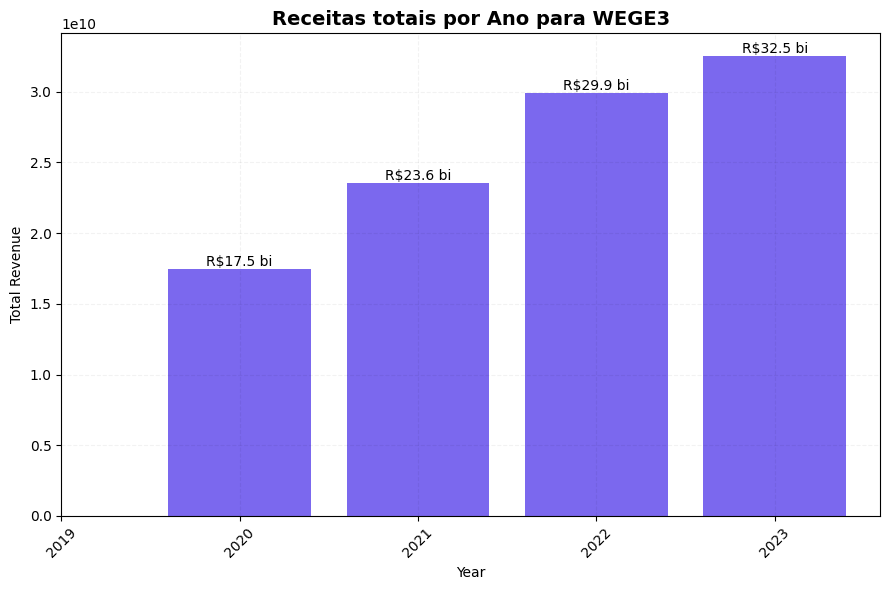

In [17]:
# Visualizar as Receitas Totais por Ano da WEGE3
plt.figure(figsize=(9, 6))
bars = plt.bar(df_WEGE3['Date'], df_WEGE3['Total Revenue'], color='mediumslateblue')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.grid(True, which='both', linestyle='--', color = 'black', alpha = 0.05)
plt.title('Receitas totais por Ano para WEGE3', fontweight='bold', fontsize=14)

# Mostrar o eixo x apenas valores inteiros
plt.xticks(range(2019, 2024))

# Dar uma girada de 45° no eixo x
plt.xticks(rotation=45)

# Adicionar rótulos nas barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'R${height/1e9:.1f} bi',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

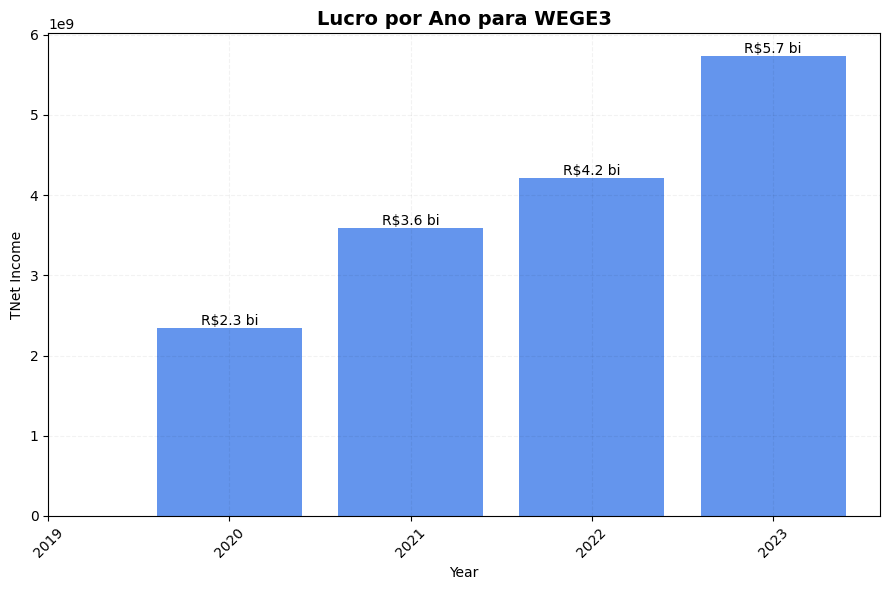

In [16]:
# Visualizar as Receitas Totais por Ano da WEGE3
plt.figure(figsize=(9, 6))
bars = plt.bar(df_WEGE3['Date'], df_WEGE3['Net Income'], color='cornflowerblue')
plt.xlabel('Year')
plt.ylabel('TNet Income')
plt.grid(True, which='both', linestyle='--', color = 'black', alpha = 0.05)
plt.title('Lucro por Ano para WEGE3', fontweight='bold', fontsize=14)

# Mostrar o eixo x apenas valores inteiros
plt.xticks(range(2019, 2024))

# Dar uma girada de 45° no eixo x
plt.xticks(rotation=45)

# Adicionar rótulos nas barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'R${height/1e9:.1f} bi',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

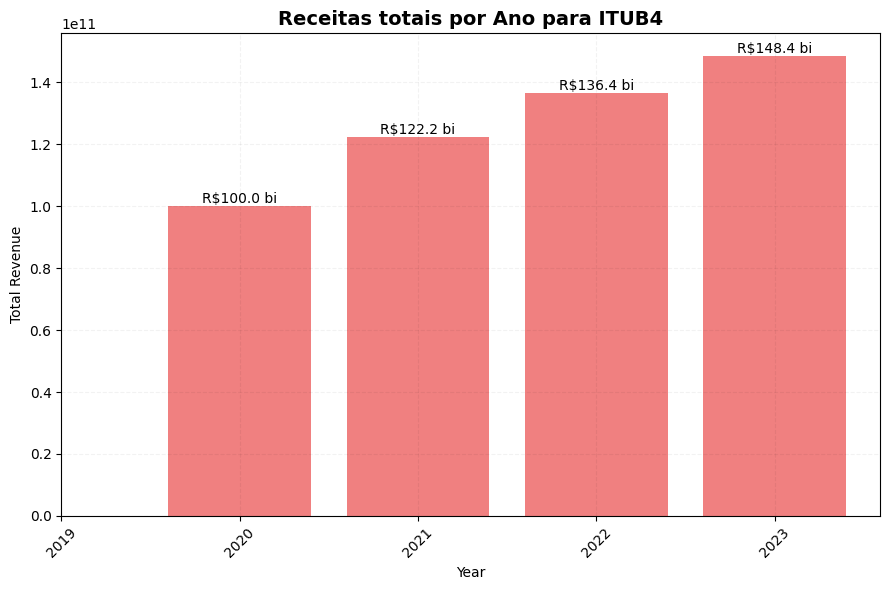

In [15]:
# Visualizar as Receitas Totais por Ano da WEGE3
plt.figure(figsize=(9, 6))
bars = plt.bar(df_ITUB4['Date'], df_ITUB4['Total Revenue'], color='lightcoral')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.grid(True, which='both', linestyle='--', color = 'black', alpha = 0.05)
plt.title('Receitas totais por Ano para ITUB4', fontweight='bold', fontsize=14)

# Mostrar o eixo x apenas valores inteiros
plt.xticks(range(2019, 2024))

# Dar uma girada de 45° no eixo x
plt.xticks(rotation=45)

# Adicionar rótulos nas barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'R${height/1e9:.1f} bi',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

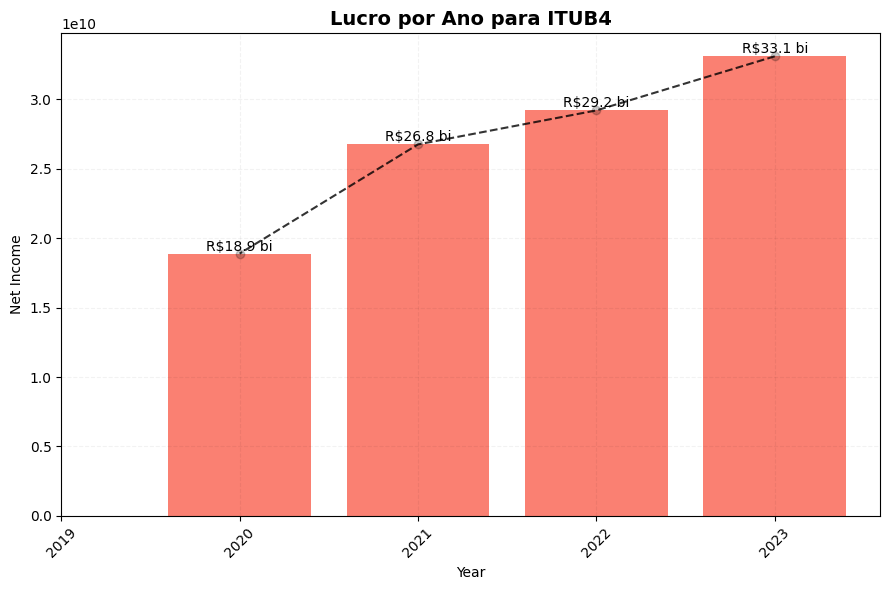

In [23]:
# Visualizar as Receitas Totais por Ano da WEGE3
plt.figure(figsize=(9, 6))
bars = plt.bar(df_ITUB4['Date'], df_ITUB4['Net Income'], color='salmon')
#vou colocar um scatter e um line
plt.scatter(df_ITUB4['Date'], df_ITUB4['Net Income'], color='black', alpha = 0.2)
plt.plot(df_ITUB4['Date'], df_ITUB4['Net Income'], color = 'black', linestyle = '--', alpha = 0.8)
plt.xlabel('Year')
plt.ylabel('Net Income')
plt.grid(True, which='both', linestyle='--', color = 'black', alpha = 0.05)
plt.title('Lucro por Ano para ITUB4', fontweight='bold', fontsize=14)

# Mostrar o eixo x apenas valores inteiros
plt.xticks(range(2019, 2024))

# Dar uma girada de 45° no eixo x
plt.xticks(rotation=45)

# Adicionar rótulos nas barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'R${height/1e9:.1f} bi',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()



---



## Baixar o Balanço Patrimonial:

### Função para baixar os dados do Balanço Patrimonial das empresas:

In [100]:
def BP():
    # Lista de tickers das empresas
    tickers = ['MGLU3.SA', 'EMBR3.SA', 'ITUB4.SA', 'WEGE3.SA']

    # Dicionário para armazenar os DataFrames
    df_dict = {}

    # Loop para baixar os balanços patrimoniais de cada empresa
    for ticker in tickers:
        try:
            # Baixa os dados do balanço patrimonial
            ativo = yf.Ticker(ticker)
            balanco = ativo.get_balance_sheet(freq='yearly')

            # Transpor o DataFrame para ter as datas no eixo das linhas
            balanco_transposto = balanco.T

            # Resetar o índice e renomear a coluna de índice para 'Date'
            balanco_transposto.reset_index(inplace=True)
            balanco_transposto.rename(columns={'index': 'Date'}, inplace=True)

            # Converter a coluna 'Date' para o tipo datetime
            balanco_transposto['Date'] = pd.to_datetime(balanco_transposto['Date'])

            #vou colocar a Date em ano apenas
            balanco_transposto['Date'] = balanco_transposto['Date'].dt.year


            # Armazena o DataFrame transposto no dicionário
            df_dict[f"bp_{ticker.split('.')[0]}"] = balanco_transposto

        except Exception as e:
            print(f"Erro ao baixar dados para o ativo {ticker}: {e}")

        except Exception as e:
            print(f"Erro ao baixar dados para o ativo {ticker}: {e}")

    # Retorna o dicionário contendo todos os DataFrames transpostos
    return df_dict

In [101]:
dataframes = BP()

In [104]:
# Acessando o DataFrame da empresa
MGLU3_bp = dataframes['bp_MGLU3']
ITUB4_bp = dataframes['bp_ITUB4']
WEGE3_bp = dataframes['bp_WEGE3']
EMBR3_bp = dataframes['bp_EMBR3']

In [103]:
EMBR3_bp.head()

,Date,TreasurySharesNumber,OrdinarySharesNumber,ShareIssued,NetDebt,TotalDebt,TangibleBookValue,InvestedCapital,WorkingCapital,NetTangibleAssets,...,TaxesReceivable,LoansReceivable,AccountsReceivable,AllowanceForDoubtfulAccountsReceivable,GrossAccountsReceivable,CashCashEquivalentsAndShortTermInvestments,OtherShortTermInvestments,CashAndCashEquivalents,CashEquivalents,CashFinancial
0,2023,5832238.0,734632806.0,740465044.0,1257200000.0,2982400000.0,455500000.0,5672900000.0,2389800000.0,455500000.0,...,203000000.0,8400000.0,217600000.0,NaN,NaN,2150900000.0,521700000.0,1629200000.0,1298900000.0,330300000.0
1,2022,5832238.0,734632806.0,740465044.0,1386300000.0,3274200000.0,321000000.0,5770700000.0,2539300000.0,321000000.0,...,105500000.0,50800000.0,202900000.0,NaN,NaN,2311300000.0,494400000.0,1816900000.0,970800000.0,846100000.0
2,2021,5832238.0,734588205.0,740420443.0,2208600000.0,4090700000.0,454500000.0,6694800000.0,3047000000.0,454500000.0,...,114500000.0,9600000.0,189000000.0,-30700000.0,219700000.0,2569100000.0,750800000.0,1818300000.0,840300000.0,978000000.0
3,2020,4291938.0,736143105.0,740435043.0,2564900000.0,4512700000.0,719300000.0,7242900000.0,3687000000.0,719300000.0,...,114100000.0,8500000.0,203400000.0,-58500000.0,261900000.0,2700600000.0,817500000.0,1883100000.0,765400000.0,1117700000.0
4,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-11100000.0,164500000.0,NaN,NaN,NaN,NaN,NaN


In [85]:
ITUB4_bp.head()

,Date,TreasurySharesNumber,OrdinarySharesNumber,ShareIssued,NetDebt,TotalDebt,TangibleBookValue,InvestedCapital,NetTangibleAssets,CapitalLeaseObligations,...,LandAndImprovements,Properties,PrepaidAssets,Receivables,OtherReceivables,AccountsReceivable,OtherShortTermInvestments,CashAndCashEquivalents,CashFinancial,CashCashEquivalentsAndFederalFundsSold
0,2023,436671.0,9803698677.0,9804135348.0,220120000000.0,451834000000.0,166813000000.0,638709000000.0,166813000000.0,3302000000.0,...,2039000000.0,NaN,7714000000.0,96514000000.0,92730000000.0,3784000000.0,130039000000.0,228412000000.0,32001000000.0,480077000000.0
1,2022,3268688.0,9800866660.0,9804135348.0,213312000000.0,427962000000.0,144603000000.0,591750000000.0,144603000000.0,3929000000.0,...,1199000000.0,NaN,6338000000.0,78372000000.0,74762000000.0,3610000000.0,126748000000.0,210721000000.0,35381000000.0,446149000000.0
2,2021,24244725.0,9779890623.0,9804135348.0,91049000000.0,321219000000.0,131754000000.0,468759000000.0,131754000000.0,5324000000.0,...,1127000000.0,NaN,5243000000.0,66297000000.0,62458000000.0,3839000000.0,105622000000.0,224846000000.0,44512000000.0,407488000000.0
3,2020,41678452.0,9762456896.0,9804135348.0,102518000000.0,299555000000.0,125663000000.0,437479000000.0,125663000000.0,5069000000.0,...,1102000000.0,NaN,4404000000.0,56921000000.0,53942000000.0,2979000000.0,109942000000.0,191968000000.0,46224000000.0,444705000000.0
4,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2560000000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Visualizando o Total Debt do ITUB4 e da EMBR3:

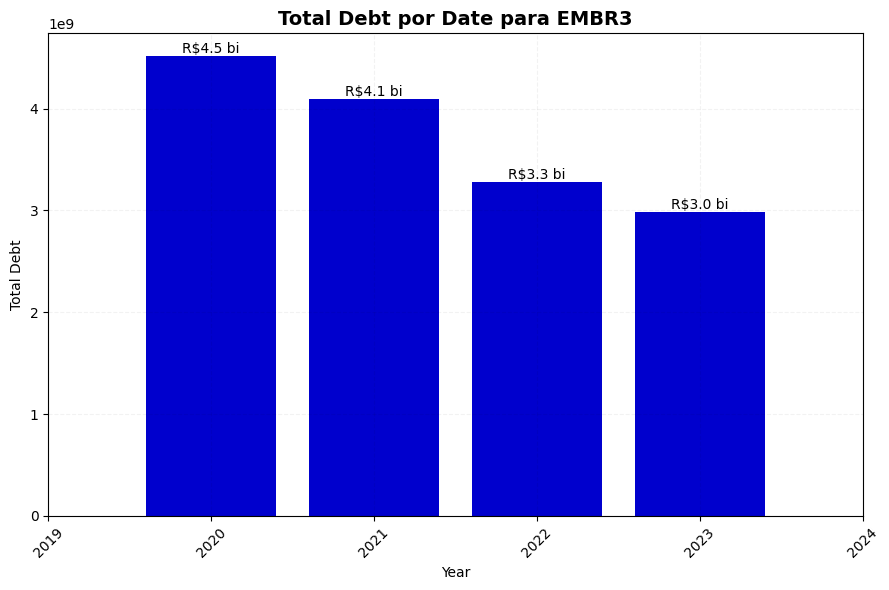

In [106]:
# Supondo que EMBR3_bp seja um DataFrame com as colunas 'Date' e 'TotalDebt'
plt.figure(figsize=(9, 6))

# Colocar um gráfico de barras
bars = plt.bar(EMBR3_bp['Date'], EMBR3_bp['TotalDebt'], color='mediumblue')

plt.xlabel('Year')
plt.ylabel('Total Debt')
plt.grid(True, which='both', linestyle='--', color='black', alpha=0.05)
plt.title('Total Debt por Date para EMBR3', fontweight='bold', fontsize=14)


plt.xlim(2019, 2024)

# Dar uma girada de 45° no eixo x
plt.xticks(rotation=45)

# Adicionar rótulos nas barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2., height,
             f'R${height / 1e9:.1f} bi',
             ha='center', va='bottom')
plt.tight_layout()
plt.show()

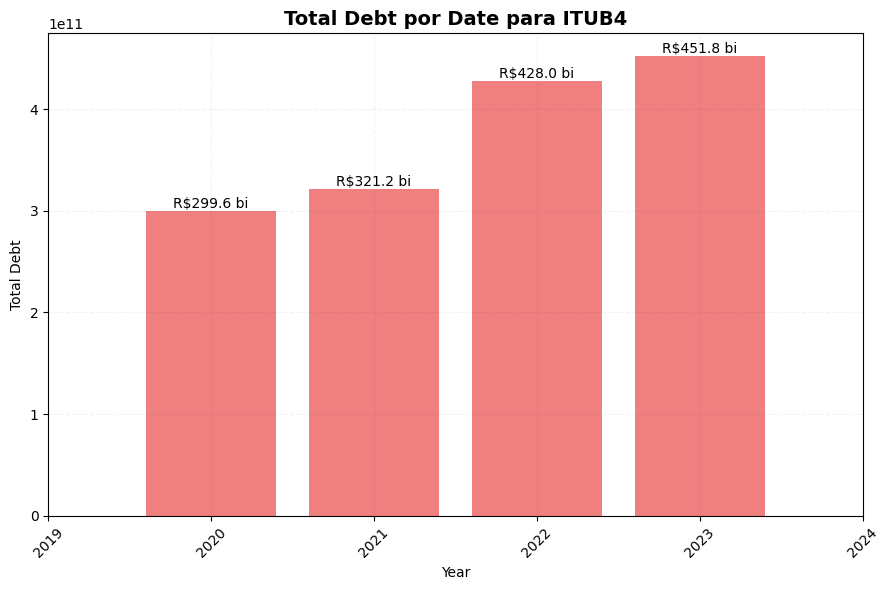

In [95]:
# Supondo que ITUB4_bp seja um DataFrame com as colunas 'Date' e 'TotalDebt'
plt.figure(figsize=(9, 6))

# Colocar um gráfico de barras
bars = plt.bar(ITUB4_bp['Date'], ITUB4_bp['TotalDebt'], color='lightcoral')

plt.xlabel('Year')
plt.ylabel('Total Debt')
plt.grid(True, which='both', linestyle='--', color='black', alpha=0.05)
plt.title('Total Debt por Date para ITUB4', fontweight='bold', fontsize=14)


plt.xlim(2019, 2024)

# Dar uma girada de 45° no eixo x
plt.xticks(rotation=45)

# Adicionar rótulos nas barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2., height,
             f'R${height / 1e9:.1f} bi',
             ha='center', va='bottom')
plt.tight_layout()
plt.show()